<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Glasses_arm_tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка зависимостей

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.6/107.7 GB disk)


In [ ]:
import os

# Загрузка датасета

PATH_DATA = '/content/glasses_arm_tag/'
PATH_DATA_YAML = PATH_DATA +'data.yaml'

%mkdir -p $PATH_DATA
%cd $PATH_DATA

FILE_ID = '1UxxLDjCDd0YHslr0YhwdKKpUieNPGkmr'
FILE_NAME = 'glasses_data.zip'

!gdown 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O {FILE_NAME}

!unzip -q -o $FILE_NAME

os.remove(os.path.join(PATH_DATA, FILE_NAME))

/content/glasses_arm_tag
Downloading...
From: https://docs.google.com/uc?export=download&id=1UxxLDjCDd0YHslr0YhwdKKpUieNPGkmr
To: /content/glasses_arm_tag/glasses_data.zip
100% 163M/163M [00:13<00:00, 11.7MB/s]


In [ ]:
!cat $PATH_DATA_YAML

train: ../train/images
val: ../valid/images

names:
  0: arm_tag


## Train

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
# Use the model
model.train(data="data.yaml", epochs=3)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, o

In [ ]:
metrics = model.val()
path = model.export(format="onnx")

Ultralytics YOLOv8.0.141 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
val: Scanning /content/glasses_arm_tag/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/glasses_arm_tag/valid/images/12.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/glasses_arm_tag/valid/images/17.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/glasses_arm_tag/valid/images/5.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.82s/it]
                   all         20         20    0.00317       0.95      0.795      0.437
Speed: 1.9ms preprocess, 190.9ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val2
Ultralytics YOLOv8.0.141 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with inp

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Results

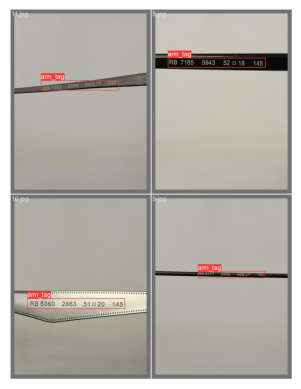

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка изображения

IGM_PATH = '/content/glasses_arm_tag/runs/detect/val/val_batch1_labels.jpg'

image = Image.open(IGM_PATH)

# Показ изображения
plt.imshow(image)
plt.axis('off')
plt.show()

## Выводы

Дообученная модель YOLOv8n довольно неплохо находит маркировку очков на валидациионной выборке.

Для улучшения результата требуется чательнее обработать датасет.
Поскольку при тренеровке модель показывает предупреждения о некачественных данных.
Что может негативно сказаться на обучении.
А также некоректно распазнает изонгнутые надписи и надписи с большим наклоном.